# Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('/content/100000 Sales Records.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [ ]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

# About 10 first rows

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [ ]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Ship Date']

0       2014-10-23
1       2015-02-27
2       2016-01-18
3       2014-10-12
4       2010-03-05
           ...    
99995   2012-09-11
99996   2013-12-10
99997   2013-08-31
99998   2011-07-03
99999   2012-04-30
Name: Ship Date, Length: 100000, dtype: datetime64[ns]

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34


# Exploratory Data Analysis (EDA)

#1.Data Understanding and Cleaning:

## What are the key variables in the dataset?

In [ ]:
#The key variables in the dataset are:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

## Are there any missing values or outliers that need to be addressed?

In [ ]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   Order Date      100000 non-null  datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  datetime64[ns]
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

In [ ]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# 2.Price and Volume Curves:

## How are the Unit Price and Units Sold curves plotted and interpreted?

## Relations between Total Revenue vs Unit Cost, Units Sold

In [ ]:
# Calculate Total Sold (i.e., Units Sold) and Total Revenue
data['Total Revenue'] = data['Unit Cost'] * data['Units Sold']
data['Total Sold'] = data['Units Sold']

# Group by Item Type and aggregate data
total_item = data.groupby(['Item Type', 'Unit Cost'])[['Units Sold', 'Total Revenue']].sum().reset_index()

# Rename columns for clarity
total_item.rename(columns={'Units Sold': 'Total Sold'}, inplace=True)

print(total_item)

          Item Type  Unit Cost  Total Sold  Total Revenue
0         Baby Food     159.42    41911620   6.681550e+09
1         Beverages      31.79    41514213   1.319737e+09
2            Cereal     117.11    42254418   4.948415e+09
3           Clothes      35.84    41773440   1.497160e+09
4         Cosmetics     263.33    41924464   1.103997e+10
5            Fruits       6.92    40797276   2.823171e+08
6         Household     502.54    41458795   2.083470e+10
7              Meat     364.69    41745367   1.522412e+10
8   Office Supplies     524.96    42293330   2.220231e+10
9     Personal Care      56.67    41517766   2.352812e+09
10           Snacks      97.44    41699092   4.063160e+09
11       Vegetables      90.93    41254836   3.751302e+09


<ipython-input-59-f6093ee52f2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Total Revenue', data=total_item, palette='viridis')


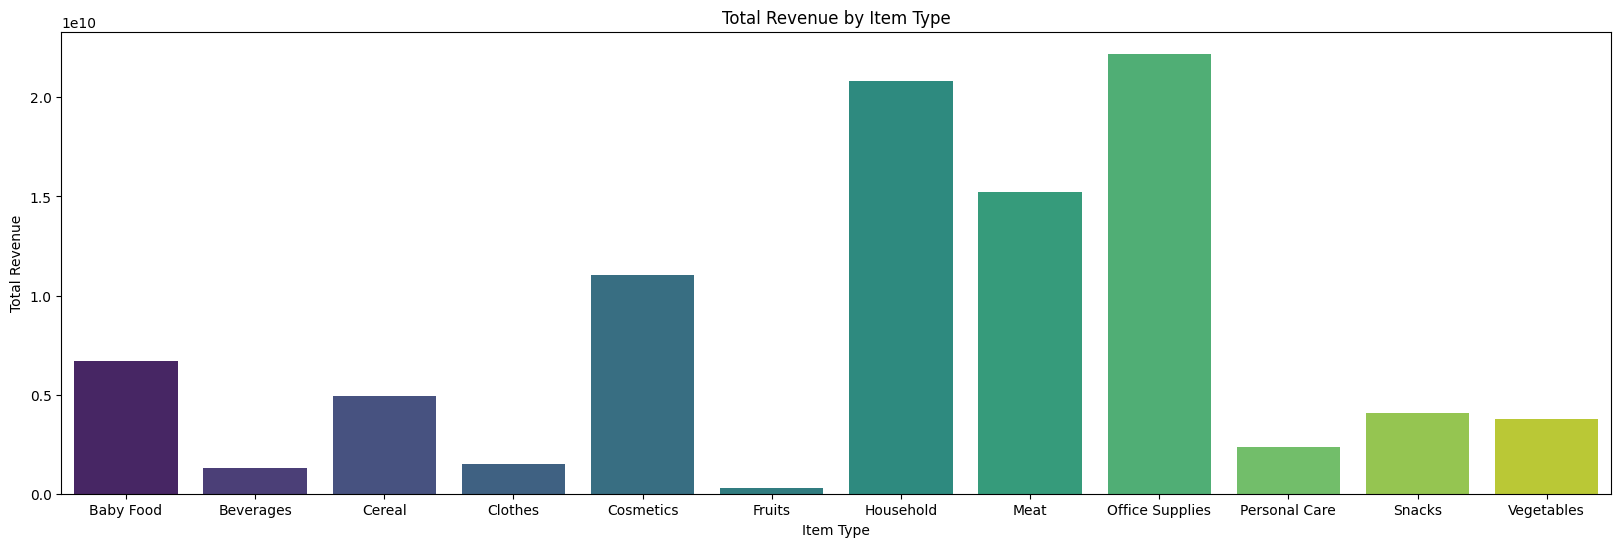

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='Item Type', y='Total Revenue', data=total_item, palette='viridis')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

## What insights can be drawn from the price and volume trends?



### Total Revenue and Total Profit by Region

<ipython-input-60-9a017e06d8ca>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='Region', y='Total Revenue', ax=ax[0], palette='coolwarm')
<ipython-input-60-9a017e06d8ca>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='Region', y='Total Profit', ax=ax[1], palette='coolwarm')


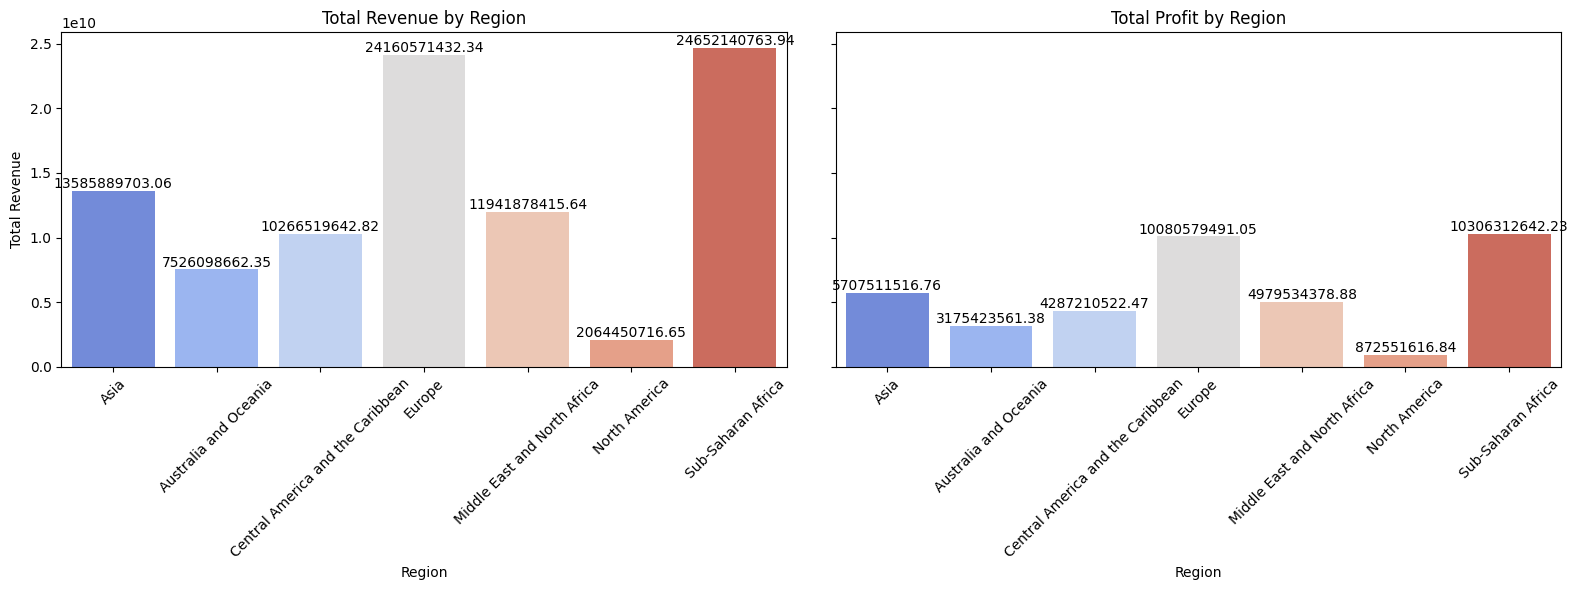

In [ ]:
# Aggregate data
region_summary = data.groupby('Region').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Total Revenue
sns.barplot(data=region_summary, x='Region', y='Total Revenue', ax=ax[0], palette='coolwarm')
ax[0].set_title('Total Revenue by Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)

# Add values on top of each bar for Total Revenue
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5), textcoords='offset points')

# Total Profit
sns.barplot(data=region_summary, x='Region', y='Total Profit', ax=ax[1], palette='coolwarm')
ax[1].set_title('Total Profit by Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)

# Add values on top of each bar for Total Profit
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

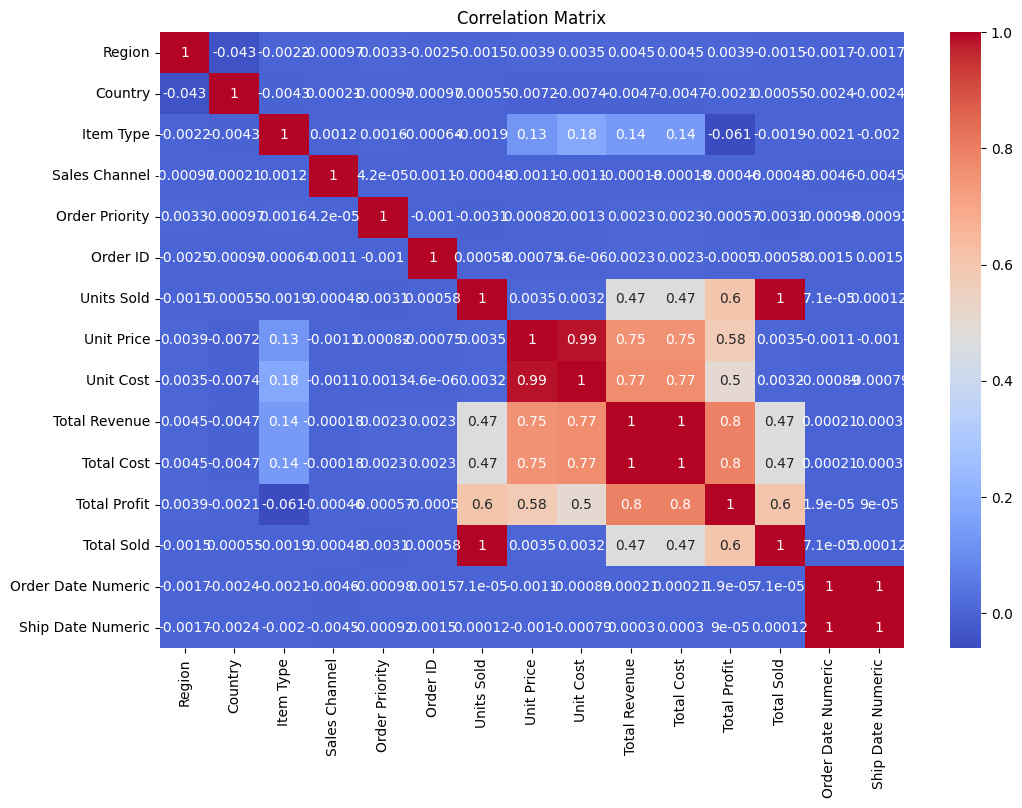

Top 10 features most correlated with Total Revenue:
Total Cost      1.000000
Total Profit    0.795110
Unit Cost       0.765211
Unit Price      0.754412
Units Sold      0.472966
Total Sold      0.472966
Item Type       0.140456
Country         0.004661
Region          0.004456
Order ID        0.002334
Name: Total Revenue, dtype: float64


In [ ]:
# Encode categorical columns
label_encoders = {}
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Optionally, convert dates to numerical features (e.g., days since a reference date)
data['Order Date Numeric'] = (data['Order Date'] - data['Order Date'].min()).dt.days
data['Ship Date Numeric'] = (data['Ship Date'] - data['Ship Date'].min()).dt.days

# Remove the original date columns
data = data.drop(columns=['Order Date', 'Ship Date'])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print the top 10 features most correlated with Total Revenue
top_10_features = correlation_matrix['Total Revenue'].abs().sort_values(ascending=False).head(11)  # including Total Revenue itself
print("Top 10 features most correlated with Total Revenue:")
print(top_10_features[1:])

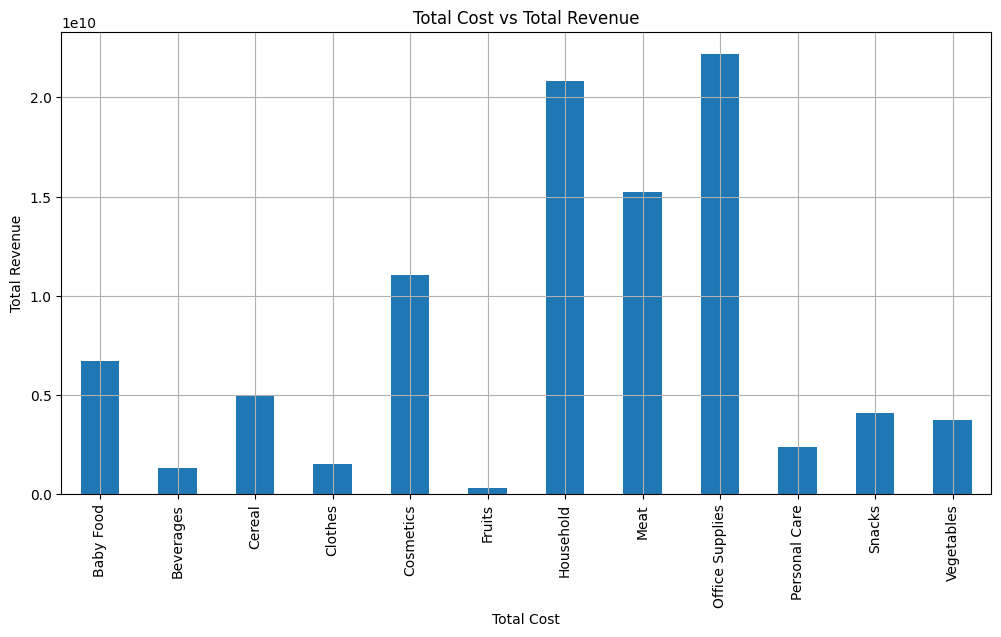

In [ ]:
plt.figure(figsize=(12,6))
total_item.groupby('Item Type')['Total Revenue'].sum().plot(kind='bar')
plt.title('Total Cost vs Total Revenue')
plt.xlabel('Total Cost')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

### Total Revenue vs Total Cost



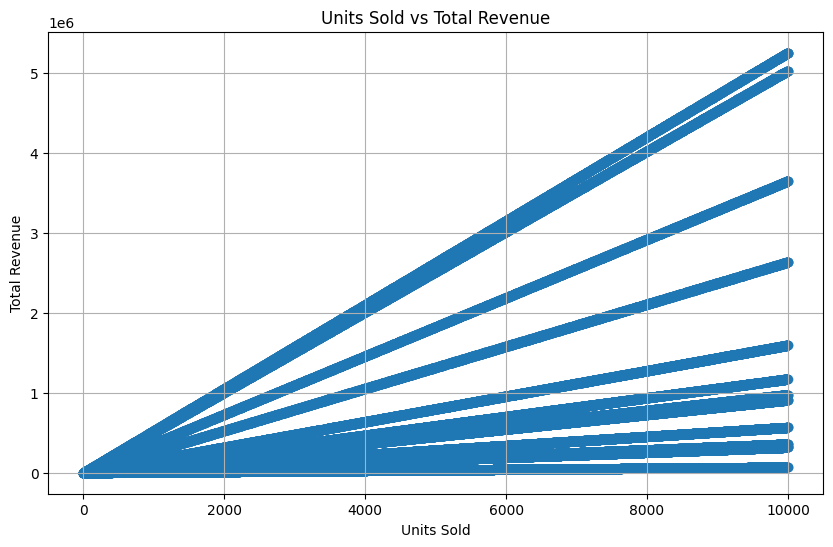

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Units Sold'], data['Total Revenue'], alpha=0.5)
plt.title('Units Sold vs Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 3.Time-Based Analysis

## How do sales, revenue, and profit change over time (e.g., monthly, quarterly)?

### Change by monthly

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sold,Order Date Numeric,Ship Date Numeric
0,4,9,10,1,0,535113847,934,152.58,97.44,91008.96,91008.96,51500.76,934,1741,1755
1,2,124,4,0,2,874708545,4551,437.20,263.33,1198414.83,1198414.83,791282.37,4551,1878,1882
2,6,139,5,0,3,854349935,9986,9.33,6.92,69103.12,69103.12,24066.26,9986,2168,2207
3,6,139,9,1,3,892836844,9118,81.73,56.67,516717.06,516717.06,228497.08,9118,1720,1744
4,2,15,6,0,1,129280602,5858,668.27,502.54,2943879.32,2943879.32,970846.34,5858,34,62


In [ ]:
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Group by YearMonth
monthly_data = data.groupby('YearMonth').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Convert YearMonth to datetime for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

KeyError: 'Order Date'

In [ ]:
monthly_data.head()

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))

plt.plot(monthly_data['YearMonth'], monthly_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(monthly_data['YearMonth'], monthly_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(monthly_data['YearMonth'], monthly_data['Total Profit'], marker='o', label='Total Profit')

plt.title('Sales, Revenue, and Profit by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

### Change by Quarterly

In [ ]:
#trich xuat quy va nam
data['YearQuarter'] = data['Order Date'].dt.to_period('Q')

# Nhóm theo YearQuarter
quarterly_data = data.groupby('YearQuarter').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Chuyển đổi YearQuarter thành datetime cho việc vẽ biểu đồ
quarterly_data['YearQuarter'] = quarterly_data['YearQuarter'].dt.to_timestamp()

In [ ]:
quarterly_data.head()

In [ ]:
# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 7))

plt.plot(quarterly_data['YearQuarter'], quarterly_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(quarterly_data['YearQuarter'], quarterly_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(quarterly_data['YearQuarter'], quarterly_data['Total Profit'], marker='o', label='Total Profit')

plt.title('Sales, Revenue, and Profit by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

## What are the seasonal trends or patterns observed in the data based on Order Date and Ship Date?

In [ ]:
# Trích xuất tháng và năm từ 'Order Date'
data['OrderYearMonth'] = data['Order Date'].dt.to_period('M')
data['OrderQuarter'] = data['Order Date'].dt.to_period('Q')

# Trích xuất tháng và năm từ 'Ship Date'
data['ShipYearMonth'] = data['Ship Date'].dt.to_period('M')
data['ShipQuarter'] = data['Ship Date'].dt.to_period('Q')

In [ ]:
# Nhóm theo OrderYearMonth để xem xu hướng hàng tháng
monthly_order_data = data.groupby('OrderYearMonth').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Nhóm theo OrderQuarter để xem xu hướng hàng quý
quarterly_order_data = data.groupby('OrderQuarter').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Nhóm theo ShipYearMonth để xem xu hướng hàng tháng cho Ship Date
monthly_ship_data = data.groupby('ShipYearMonth').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Nhóm theo ShipQuarter để xem xu hướng hàng quý cho Ship Date
quarterly_ship_data = data.groupby('ShipQuarter').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()


In [ ]:
# Vẽ biểu đồ xu hướng hàng tháng dựa trên Order Date
plt.figure(figsize=(22, 7))
plt.plot(monthly_order_data['OrderYearMonth'].astype(str), monthly_order_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(monthly_order_data['OrderYearMonth'].astype(str), monthly_order_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(monthly_order_data['OrderYearMonth'].astype(str), monthly_order_data['Total Profit'], marker='o', label='Total Profit')
plt.title('Xu hướng Doanh số, Doanh thu và Lợi nhuận hàng tháng theo Order Date')
plt.xlabel('Tháng')
plt.ylabel('Giá trị')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Vẽ biểu đồ xu hướng hàng quý dựa trên Order Date
plt.figure(figsize=(14, 7))
plt.plot(quarterly_order_data['OrderQuarter'].astype(str), quarterly_order_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(quarterly_order_data['OrderQuarter'].astype(str), quarterly_order_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(quarterly_order_data['OrderQuarter'].astype(str), quarterly_order_data['Total Profit'], marker='o', label='Total Profit')
plt.title('Xu hướng Doanh số, Doanh thu và Lợi nhuận hàng quý theo Order Date')
plt.xlabel('Quý')
plt.ylabel('Giá trị')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(monthly_ship_data['ShipYearMonth'].astype(str), monthly_ship_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(monthly_ship_data['ShipYearMonth'].astype(str), monthly_ship_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(monthly_ship_data['ShipYearMonth'].astype(str), monthly_ship_data['Total Profit'], marker='o', label='Total Profit')
plt.title('Xu hướng Doanh số, Doanh thu và Lợi nhuận hàng tháng theo Ship Date')
plt.xlabel('Tháng')
plt.ylabel('Giá trị')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(quarterly_ship_data['ShipQuarter'].astype(str), quarterly_ship_data['Units Sold'], marker='o', label='Total Sales')
plt.plot(quarterly_ship_data['ShipQuarter'].astype(str), quarterly_ship_data['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(quarterly_ship_data['ShipQuarter'].astype(str), quarterly_ship_data['Total Profit'], marker='o', label='Total Profit')
plt.title('Xu hướng Doanh số, Doanh thu và Lợi nhuận hàng quý theo Ship Date')
plt.xlabel('Quý')
plt.ylabel('Giá trị')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## **Answer**
The seasonal trends or patterns observed in the data based on Order Date and Ship Date:
- Order Date:
- Ship Date:

# 4.Regional and Country Analysis

## How do sales, revenue, and profit vary across different regions (e.g., Region) and countries (e.g., Country)?

In [ ]:
data.head()

In [ ]:
data_copy = data.copy()

In [ ]:
#nhóm theo tháng và khu vực
data['OrderYearMonth'] = data_copy['Order Date'].dt.to_period('M')
monthly_region_data = data.groupby(['OrderYearMonth', 'Region']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()
monthly_region_data['OrderYearMonth'] = monthly_region_data['OrderYearMonth'].astype(str)
monthly_region_data.head()

In [ ]:
# Vẽ biểu đồ đường cho các khu vực (Region)
plt.figure(figsize=(25, 7))
sns.lineplot(x='OrderYearMonth', y='Units Sold', hue='Region', data=monthly_region_data, marker='o')
plt.title('Monthly Units Sold by Region')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

In [ ]:
plt.figure(figsize=(25, 7))
sns.lineplot(x='OrderYearMonth', y='Total Revenue', hue='Region', data=monthly_region_data, marker='o')
plt.title('Monthly Total Revenue by Region')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

In [ ]:
plt.figure(figsize=(22, 7))
sns.lineplot(x='OrderYearMonth', y='Total Profit', hue='Region', data=monthly_region_data, marker='o')
plt.title('Monthly Total Profit by Region')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

In [ ]:
#nhóm theo tháng và quốc gia
# Trích xuất tháng và năm từ 'Order Date'
data['OrderYearMonth'] = data['Order Date'].dt.to_period('M').astype(str)
monthly_country_data = data.groupby(['OrderYearMonth', 'Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()
monthly_country_data.head()

In [ ]:
monthly_country_data['Country'].value_counts()

In [ ]:
# Trích xuất năm từ cột 'Order Date'
data['OrderYear'] = data['Order Date'].dt.year

# Nhóm dữ liệu theo năm và quốc gia (Country)
annual_country_data = data.groupby(['OrderYear', 'Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

In [ ]:
# Chọn một số quốc gia tiêu biểu
selected_countries = ['United States', 'Germany', 'China', 'Brazil', 'India']  # Ví dụ

# Lọc dữ liệu theo các quốc gia đã chọn
filtered_data = annual_country_data[annual_country_data['Country'].isin(selected_countries)]

# Vẽ biểu đồ đường cho Units Sold theo năm
plt.figure(figsize=(14, 7))
sns.lineplot(x='OrderYear', y='Units Sold', hue='Country', data=filtered_data, marker='o')
plt.title('Annual Units Sold by Selected Countries')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Vẽ biểu đồ đường cho Total Revenue theo năm
plt.figure(figsize=(14, 7))
sns.lineplot(x='OrderYear', y='Total Revenue', hue='Country', data=filtered_data, marker='o')
plt.title('Annual Total Revenue by Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Vẽ biểu đồ đường cho Total Profit theo năm
plt.figure(figsize=(14, 7))
sns.lineplot(x='OrderYear', y='Total Profit', hue='Country', data=filtered_data, marker='o')
plt.title('Annual Total Profit by Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## What are the top-performing regions and countries in terms of Total Revenue and Total Profit?

In [ ]:
# Tính tổng doanh thu và lợi nhuận cho từng khu vực
region_performance = data.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Tính tổng doanh thu và lợi nhuận cho từng quốc gia
country_performance = data.groupby('Country').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

In [ ]:
# Sắp xếp khu vực theo tổng doanh thu và lợi nhuận
top_regions_by_revenue = region_performance.sort_values(by='Total Revenue', ascending=False)
top_regions_by_profit = region_performance.sort_values(by='Total Profit', ascending=False)

# Sắp xếp quốc gia theo tổng doanh thu và lợi nhuận
top_countries_by_revenue = country_performance.sort_values(by='Total Revenue', ascending=False)
top_countries_by_profit = country_performance.sort_values(by='Total Profit', ascending=False)

# In kết quả
print("Top Regions by Total Revenue:")
print(top_regions_by_revenue.head(10))  # Hiển thị 10 khu vực hàng đầu theo doanh thu

print("\nTop Regions by Total Profit:")
print(top_regions_by_profit.head(10))  # Hiển thị 10 khu vực hàng đầu theo lợi nhuận

print("\nTop Countries by Total Revenue:")
print(top_countries_by_revenue.head(10))  # Hiển thị 10 quốc gia hàng đầu theo doanh thu

print("\nTop Countries by Total Profit:")
print(top_countries_by_profit.head(10))  # Hiển thị 10 quốc gia hàng đầu theo lợi nhuận


In [ ]:
# Vẽ biểu đồ cột cho các khu vực theo tổng doanh thu
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Revenue', y='Region', data=top_regions_by_revenue.head(10), palette='viridis')
plt.title('Top 10 Regions by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

# Vẽ biểu đồ cột cho các khu vực theo tổng lợi nhuận
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Profit', y='Region', data=top_regions_by_profit.head(10), palette='viridis')
plt.title('Top 10 Regions by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.show()

# Model Development and Evaluation


# 5.Model Selection and Parameters:


## Check Outlier

In [ ]:
# Plotting box plots for numerical columns to check for outliers
numerical_features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

## Outlier Handling

In [ ]:
def replace_outliers_with_median(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])  #check if 1 of 2 true --> total true
    return data

columns_to_check = ['Units Sold', 'Total Revenue', 'Total Profit']
for col in columns_to_check:
    data = replace_outliers_with_median(data, col)

In [ ]:
_columns = ['Units Sold', 'Total Revenue', 'Total Profit']
fig = make_subplots(rows=1, cols=len(_columns))

for i, _col in enumerate(_columns, start=1):
    y0 = data[_col].values
    fig.add_trace(go.Box(y=y0, name=_col), row=1, col=i)
fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1500, title_text="Outliers")
fig.show()

## What models are being considered for predicting sales, revenue, or profit?

To predict sales, revenue, or profit, you can consider several types of predictive models, each with its own strengths and applications. Some commonly used models and approaches:
- Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Ridge and Lasso Regression
- Decision Trees
- Support Vector Regression (SVR)

In [ ]:
#Example using Linear Regression
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

#Example using Decision Trees
from sklearn.tree import DecisionTreeRegressor
model_trees = DecisionTreeRegressor()

## How are the best model parameters chosen (e.g., through hyperparameter tuning)?


1. **Grid Search**

Grid Search is an exhaustive search method where you specify a set of possible values for each hyperparameter. The model is trained and evaluated for every possible combination of these values.

2. **Random Search**

Random Search is similar to Grid Search but instead of trying all possible combinations, it tries a fixed number of random combinations of hyperparameters. This can be more efficient when dealing with large hyperparameter spaces.

3. **Bayesian Optimization**

Bayesian Optimization is a more sophisticated method that builds a probabilistic model of the function mapping hyperparameters to a score. It chooses the hyperparameters by balancing exploration (trying new things) and exploitation (using known good results).


# 6.Training and Testing

In [ ]:
# Feature engineering (e.g., extracting month and year from Order Date)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

X = data.drop(columns=['Total Revenue'])
y = data['Total Revenue']

In [ ]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the features and target
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
print(X_imputed.shape)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

In [ ]:
# Define threshold
threshold = np.median(y_imputed)

# Convert actual and predicted values ​​to classification labels
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

### Linear Regression

In [ ]:
# Train the model
model_linear.fit(X_train, y_train)

# Evaluate the model
y_pred_train_linear = model_linear.predict(X_train)
y_pred_test_linear = model_linear.predict(X_test)

### Decision Trees

In [ ]:
model_trees.fit(X_train, y_train)
# Evaluate the model
y_pred_train_trees = model_trees.predict(X_train)
y_pred_test_trees = model_trees.predict(X_test)

y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

### Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

In [ ]:
y_pred_test_random_forest = model_rf.predict(X_test)
y_pred_train_random_forest = model_rf.predict(X_train)

y_pred_test_class_random_forest = (y_pred_test_random_forest >= threshold).astype(int)
y_pred_train_class_random_forest = (y_pred_train_random_forest >= threshold).astype(int)

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Định nghĩa tham số tìm kiếm cho từng mô hình
param_grids = {
    'linear_regression': {},
    'decision_tree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    }
}

# Khởi tạo các mô hình
models = {
    'linear_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])
}

# Thực hiện GridSearchCV cho mỗi mô hình
results = {}

for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện và kiểm tra
    y_pred_train = grid.best_estimator_.predict(X_train)
    y_pred_test = grid.best_estimator_.predict(X_test)

    # Đánh giá mô hình
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Chuyển đổi dự đoán thành lớp
    y_pred_train_class = (y_pred_train >= threshold).astype(int)
    y_pred_test_class = (y_pred_test >= threshold).astype(int)

    accuracy_train = accuracy_score((y_train >= threshold).astype(int), y_pred_train_class)
    accuracy_test = accuracy_score((y_test >= threshold).astype(int), y_pred_test_class)

    # Lưu kết quả
    results[model_name] = {
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test
    }

# Hiển thị kết quả
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Score (CV): {result['best_score']}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Training MSE: {result['mse_train']}")
    print(f"Test MSE: {result['mse_test']}")
    print(f"Training Accuracy: {result['accuracy_train']}")
    print(f"Test Accuracy: {result['accuracy_test']}")
    print("\n")

# 7.Metrics for Evaluation

## What are the key metrics used to evaluate the models (e.g., accuracy, precision, recall, F1 score)?

In [ ]:
y_pred_train_class_linear = (y_pred_train_linear >= threshold).astype(int)
y_pred_test_class_linear = (y_pred_test_linear >= threshold).astype(int)

#Calculate accuracy
print("Using Linear Regression")
print("Accuracy on Train Set:", accuracy_score(y_train_class, y_pred_train_class_linear))
print("Accuracy on Test Set:", accuracy_score(y_test_class, y_pred_test_class_linear))

print("\nClassification Report for Train Set:")
print(classification_report(y_train_class, y_pred_train_class_linear))

print("\nClassification Report for Test Set:")
print(classification_report(y_test_class, y_pred_test_class_linear))

In [ ]:
print("Decision Trees")
y_pred_train_class_trees = (y_pred_train_trees >=threshold).astype(int)
y_pred_test_class_trees = (y_pred_test_trees >= threshold).astype(int)

print("Using Decision Trees")
print("Accuracy on Train Set:", accuracy_score(y_train_class, y_pred_train_class_trees))
print("Accuracy on Test Set:", accuracy_score(y_test_class, y_pred_test_class_trees))

print("\nClassification Report for Train Set:")
print(classification_report(y_train_class, y_pred_train_class_trees))

print("\nClassification Report for Test Set:")
print(classification_report(y_test_class, y_pred_test_class_trees))

In [ ]:
print("Random Forest")
y_pred_train_class_random_forest = (y_pred_train_trees >=threshold).astype(int)
y_pred_test_class_random_forest = (y_pred_test_trees >= threshold).astype(int)

print("Using Decision Trees")
print("Accuracy on Train Set:", accuracy_score(y_train_class, y_pred_train_class_random_forest))
print("Accuracy on Test Set:", accuracy_score(y_test_class, y_pred_test_class_random_forest))

print("\nClassification Report for Train Set:")
print(classification_report(y_train_class, y_pred_train_class_random_forest))

print("\nClassification Report for Test Set:")
print(classification_report(y_test_class, y_pred_test_class_random_forest))

## How are these metrics interpreted and used to compare the performance of different models?

**1. Mean Squared Error (MSE)**

- Definition: Average of squared differences between predicted and actual values.

- Interpretation: Lower MSE indicates better fit. Sensitive to outliers.

- Usage: Compare MSE between models to determine overall error magnitude.

**2. Mean Absolute Error (MAE)**

- Definition: Average of absolute differences between predicted and actual values.
- Interpretation: Lower MAE indicates closer predictions. Less sensitive to outliers.
- Usage: Compare MAE for a balanced view of error magnitude.

**3. R² (Coefficient of Determination)**
- Definition: Proportion of variance in the target variable explained by the model.
- Interpretation: Ranges from 0 to 1. Higher R² indicates better model fit.
- Usage: Assess model's goodness-of-fit, but be cautious of overfitting.



**Comparing Models**
- MSE and MAE: Lower values indicate better performance.MAE provide insights into error magnitude.
- R²: Higher values indicate better model fit. Use alongside other metrics to avoid misleading results.
- Overfitting: Check if the model performs well on both training and testing sets.
- Cross-Validation: Ensures reliable performance metrics by validating on multiple train-test splits.

# Overall



In [22]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

# Đọc dữ liệu
data = pd.read_csv("/content/100000 Sales Records.csv")
data.drop(columns = ['Ship Date', 'Order Date'], axis=1, inplace=True)

# Các cột phân loại và số
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
numeric_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit', 'Total Revenue']

# ColumnTransformer cho mã hóa one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
        ('num', 'passthrough', numeric_columns)
    ]
)

# Tạo pipeline tiền xử lý
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

# Tiền xử lý dữ liệu
data_preprocessed = preprocessing_pipeline.fit_transform(data)

# Tách dữ liệu thành X và y
X = pd.DataFrame(data_preprocessed, columns=[*preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns), *numeric_columns])
y = X.pop('Total Revenue')

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Đánh giá
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Train Set: ", mse_train)
print("Mean Squared Error on Test Set: ", mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R2 Score on Train Set: ", r2_train)
print("R2 Score on Test Set: ", r2_test)

Mean Squared Error on Train Set:  3.6790510450562403e-31
Mean Squared Error on Test Set:  3.7799721928376483e-31
R2 Score on Train Set:  1.0
R2 Score on Test Set:  1.0
